## **CIND 820 - Big Data Analytics Project**

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt # to create the scree plot
from sklearn.preprocessing import StandardScaler  # to standardize the features
from sklearn.decomposition import PCA  # to apply PCA

**Create a data frame of the Room Occupancy dataset. Display the names of the columns. Check the data types of the attributes. Run a summary statistics of the dataset.**

In [3]:
# Read the CSV file into a data frame called Occupancy
Occupancy = pd.read_csv('Occupancy_Estimation.csv')

# Display the first five records of the data frame
Occupancy.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [4]:
# Get the column names
print("Column Names:", Occupancy.columns)

Column Names: Index(['Date', 'Time', 'S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp', 'S1_Light',
       'S2_Light', 'S3_Light', 'S4_Light', 'S1_Sound', 'S2_Sound', 'S3_Sound',
       'S4_Sound', 'S5_CO2', 'S5_CO2_Slope', 'S6_PIR', 'S7_PIR',
       'Room_Occupancy_Count'],
      dtype='object')


In [5]:
# Get the data types of each column
print("\nData Types of Each Column:")
print(Occupancy.dtypes)


Data Types of Each Column:
Date                     object
Time                     object
S1_Temp                 float64
S2_Temp                 float64
S3_Temp                 float64
S4_Temp                 float64
S1_Light                  int64
S2_Light                  int64
S3_Light                  int64
S4_Light                  int64
S1_Sound                float64
S2_Sound                float64
S3_Sound                float64
S4_Sound                float64
S5_CO2                    int64
S5_CO2_Slope            float64
S6_PIR                    int64
S7_PIR                    int64
Room_Occupancy_Count      int64
dtype: object


In [6]:
# Get the summary statistics
print("Summary Statistics:")
print(Occupancy.describe())

Summary Statistics:
            S1_Temp       S2_Temp       S3_Temp       S4_Temp      S1_Light  \
count  10129.000000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      25.454012     25.546059     25.056621     25.754125     25.445059   
std        0.351351      0.586325      0.427283      0.356434     51.011264   
min       24.940000     24.750000     24.440000     24.940000      0.000000   
25%       25.190000     25.190000     24.690000     25.440000      0.000000   
50%       25.380000     25.380000     24.940000     25.750000      0.000000   
75%       25.630000     25.630000     25.380000     26.000000     12.000000   
max       26.380000     29.000000     26.190000     26.560000    165.000000   

          S2_Light      S3_Light      S4_Light      S1_Sound      S2_Sound  \
count  10129.00000  10129.000000  10129.000000  10129.000000  10129.000000   
mean      26.01629     34.248494     13.220259      0.168178      0.120066   
std       67.30417     58.400744  

**Standardize the features**

In [19]:
# Create the scaler
scaler = StandardScaler()   # mean = 0 and standard deviation = 1

# Transform the numeric data
X = pd.DataFrame(scaler.fit_transform(Occupancy.iloc[:, 2:16]))

# Add the column names for the features
X.columns = ['S1_Temp', 'S2_Temp', 'S3_Temp', 'S4_Temp',
             'S1_Light', 'S2_Light', 'S3_Light', 'S4_Light',
             'S1_Sound', 'S2_Sound', 'S3_Sound', 'S4_Sound',
             'S5_CO2', 'S5_CO2_Slope']

# Define the target variable
y = Occupancy['Room_Occupancy_Count']

In [20]:
X.head()

,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope
0,-1.463033,-1.357775,-1.162334,-1.049684,1.873305,0.118627,0.321099,1.366226,-0.278432,0.262426,-0.237223,-0.363288,-0.354382,0.664469
1,-1.463033,-1.357775,-1.162334,-0.881342,1.873305,0.103769,0.321099,1.366226,2.405552,-0.262923,-0.237223,-0.363288,-0.354382,0.558817
2,-1.292255,-1.357775,-1.302764,-0.881342,1.873305,0.118627,0.321099,1.366226,0.826738,-0.037773,-0.188869,-0.363288,-0.354382,0.449864
3,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.321099,1.366226,0.763585,-0.075298,-0.140515,-0.114690,-0.354382,0.337609
4,-1.292255,-1.357775,-1.162334,-0.881342,1.873305,0.118627,0.338223,1.366226,0.037331,-0.225398,-0.237223,-0.363288,-0.354382,0.222053


**Check the Co-relation between featrues without PCA**

<Axes: >

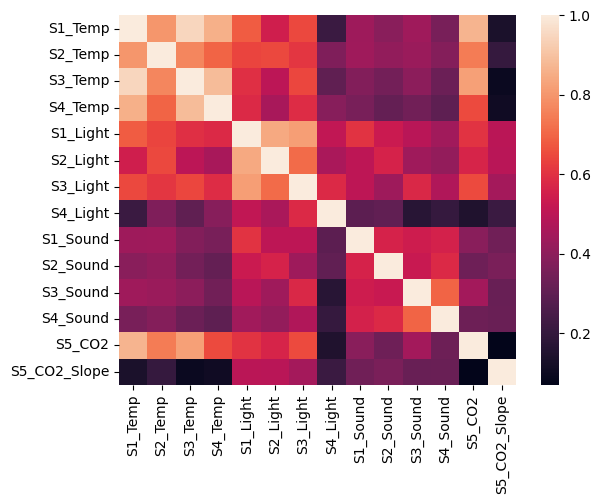

In [21]:
# Check the Co-relation between features without PCA
sns.heatmap(X.corr())

Based on the above heatmap, we can see that several pairs of features have moderate to highter correlation.

**Applying Principal Component Analysis**

I've chosen 5 as the number of principal components we want in our final dataset.

In [22]:
# Applying PCA
# Taking no. of Principal Components as 5
pca = PCA(n_components = 5)
pca.fit(X)
data_pca = pca.transform(X)
data_pca = pd.DataFrame(data_pca,columns=['PC1','PC2','PC3','PC4','PC5'])
data_pca.head()

,PC1,PC2,PC3,PC4,PC5
0,-0.681422,2.109987,1.954008,0.187910,-0.095265
1,-0.125187,2.534918,1.534751,0.611533,0.538040
2,-0.445048,2.163628,1.729571,0.445660,0.137738
3,-0.377193,2.129176,1.590179,0.555593,0.023137
4,-0.677980,1.749557,1.867365,0.424164,-0.189310


**Create the Scree Plot**

In [23]:
# Calculate the percentage of total variance explained by each principal component
print(pca.explained_variance_ratio_)

[0.5358057  0.13715445 0.08474369 0.05426844 0.04055611]


- The first principal component explains **53.58%** of the total variation in the dataset.
- The second principal component explains **13.72%** of the total variation in the dataset.
- The third principal component explains **8.47%** of the total variation in the dataset.
- The fourth principal component explains **5.43%** of the total variation in the dataset.
- The fifth principal component explains **4.06%** of the total variation in the dataset.

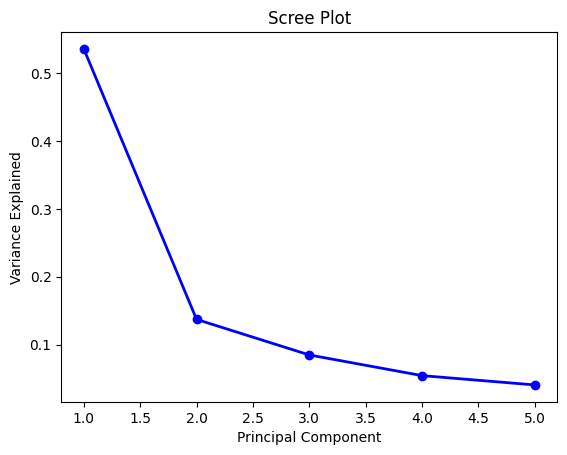

In [24]:
# Plot the scree plot
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [29]:
# Which features contribute the most to each component
print(abs( pca.components_ ))

[[0.31305327 0.30119141 0.30097854 0.28076642 0.31921662 0.29282727
  0.31312718 0.17807737 0.24240918 0.2311568  0.24040227 0.22044333
  0.28866628 0.15014612]
 [0.32162779 0.19581932 0.35501536 0.32261081 0.10943526 0.15004053
  0.0666914  0.11620189 0.25542813 0.3046935  0.24042967 0.31423217
  0.29561902 0.4166981 ]
 [0.11255799 0.01702059 0.05542094 0.04545622 0.23449429 0.24745281
  0.21143392 0.57959884 0.18272345 0.17661112 0.40847034 0.41367031
  0.15438129 0.24219742]
 [0.11723609 0.02571437 0.01004438 0.13964287 0.1400193  0.21800496
  0.00078812 0.62805327 0.15781596 0.17216125 0.07157667 0.21624928
  0.18424181 0.60335145]
 [0.04419216 0.13866143 0.05802103 0.08781231 0.08303463 0.25758701
  0.37815671 0.13398343 0.34485669 0.55884557 0.44920053 0.25399426
  0.02203108 0.18849048]]


For component one, feature 5 (S1_Light) at contributes the most followed by feature 7 (S3_Light), feature 1 (S1_Temp), feature 2 (S2_Temp), and feature 3 (S3_Temp).

**Checking Co-relation between features after PCA**

<Axes: >

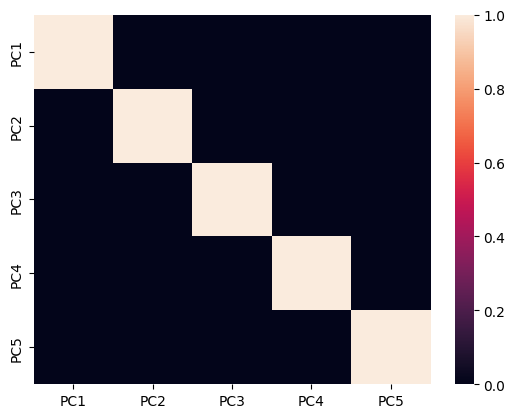

In [25]:
#Checking Co-relation between features after PCA
sns.heatmap(data_pca.corr())

Based on the above heatmap, there is no correlation between the principal components (PC1, PC2, PC3, PC4, and PC5).

In [26]:
# Add the Room_Occupancy_Count to the reduced dataset
data_pca['Room_Occupancy_Count'] = y
data_pca.head()

,PC1,PC2,PC3,PC4,PC5,Room_Occupancy_Count
0,-0.681422,2.109987,1.954008,0.187910,-0.095265,1
1,-0.125187,2.534918,1.534751,0.611533,0.538040,1
2,-0.445048,2.163628,1.729571,0.445660,0.137738,1
3,-0.377193,2.129176,1.590179,0.555593,0.023137,1
4,-0.677980,1.749557,1.867365,0.424164,-0.189310,1


In [27]:
# Export CSV to working directory
data_pca.to_csv('pca.csv')